In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

PATH = '/kaggle/input/power-transformers-fdd-and-rul/'

Read the y_data (RUL)

In [2]:
y_data = pd.read_csv(PATH + 'labels_rul_train.csv', index_col='id')
y_data.head()

,predicted
id,
2_trans_497.csv,550
2_trans_483.csv,1093
2_trans_2396.csv,861
2_trans_1847.csv,1093
2_trans_2382.csv,488


**Read X_data (Четыре газа)**

In [3]:
X_data = {}
for row in y_data.iterrows():
    file_name = row[0]
    path = PATH + f'data_train/{file_name}'
    X_data[file_name] = pd.read_csv(path)

**see x_data**

In [4]:
first_key = list(X_data.keys())[0]
first_value = X_data[first_key]

print("First file name:", first_key)
print("First value stored:\n", first_value)


First file name: 2_trans_497.csv
First value stored:
            H2        CO      C2H4      C2H2
0    0.001202  0.029565  0.001069  0.000251
1    0.001202  0.029563  0.001068  0.000251
2    0.001201  0.029562  0.001066  0.000251
3    0.001201  0.029562  0.001064  0.000251
4    0.001201  0.029561  0.001063  0.000251
..        ...       ...       ...       ...
415  0.002276  0.041801  0.004549  0.000343
416  0.002281  0.041875  0.004569  0.000344
417  0.002285  0.041950  0.004590  0.000344
418  0.002290  0.042025  0.004610  0.000345
419  0.002294  0.042099  0.004630  0.000345

[420 rows x 4 columns]


**Making copy for y and preprocess x**

In [5]:
y = y_data.copy()
X = pd.concat([X_data[file].mean() for file in y_data.index], axis=1).T
X.index = y.index
X = X.add_suffix('_mean')

In [6]:
X.head()

,H2_mean,CO_mean,C2H4_mean,C2H2_mean
id,,,,
2_trans_497.csv,0.001587,0.033522,0.002054,0.000277
2_trans_483.csv,0.002204,0.032708,0.003516,0.000089
2_trans_2396.csv,0.001134,0.026185,0.001413,0.000109
2_trans_1847.csv,0.000953,0.020431,0.005917,0.000295
2_trans_2382.csv,0.001933,0.010844,0.009218,0.000268


In [7]:
y.head()

,predicted
id,
2_trans_497.csv,550
2_trans_483.csv,1093
2_trans_2396.csv,861
2_trans_1847.csv,1093
2_trans_2382.csv,488


**See missing value**

In [8]:
print(X.isnull().sum())
print(y.isnull().sum())

H2_mean      0
CO_mean      0
C2H4_mean    0
C2H2_mean    0
dtype: int64
predicted    0
dtype: int64


**See duplicate value**

In [9]:
duplicates = X.duplicated().sum()
print(f'Number of duplicated rows: {duplicates}')


Number of duplicated rows: 0


**Describe the data**

In [10]:
print(X.describe())

           H2_mean      CO_mean    C2H4_mean    C2H2_mean
count  2100.000000  2100.000000  2100.000000  2100.000000
mean      0.001771     0.017072     0.004809     0.000194
std       0.000867     0.009744     0.002727     0.000110
min       0.000048     0.000512     0.000132     0.000006
25%       0.001037     0.008823     0.002525     0.000101
50%       0.001809     0.016944     0.004743     0.000192
75%       0.002515     0.025483     0.007150     0.000284
max       0.003763     0.039082     0.010654     0.000449


**Cheking for outliers**

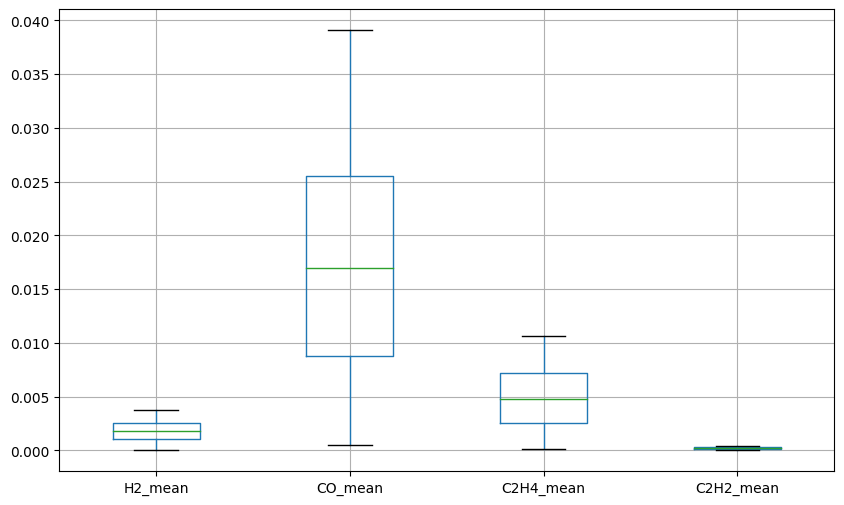

In [11]:
X.boxplot(figsize=(10,6))
plt.show()

In [12]:
print(X.shape)
print(y.shape)

(2100, 4)
(2100, 1)


**Distribution of y values**/
**there is a problem in 1100 value (data imbalanced)**

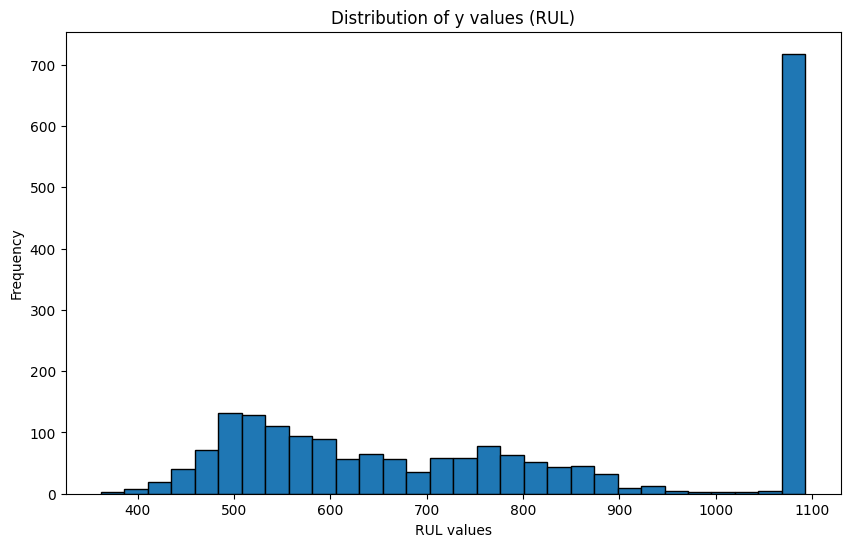

In [13]:
plt.figure(figsize=(10,6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of y values (RUL)')
plt.xlabel('RUL values')
plt.ylabel('Frequency')
plt.show()

**Relation between y and every column**

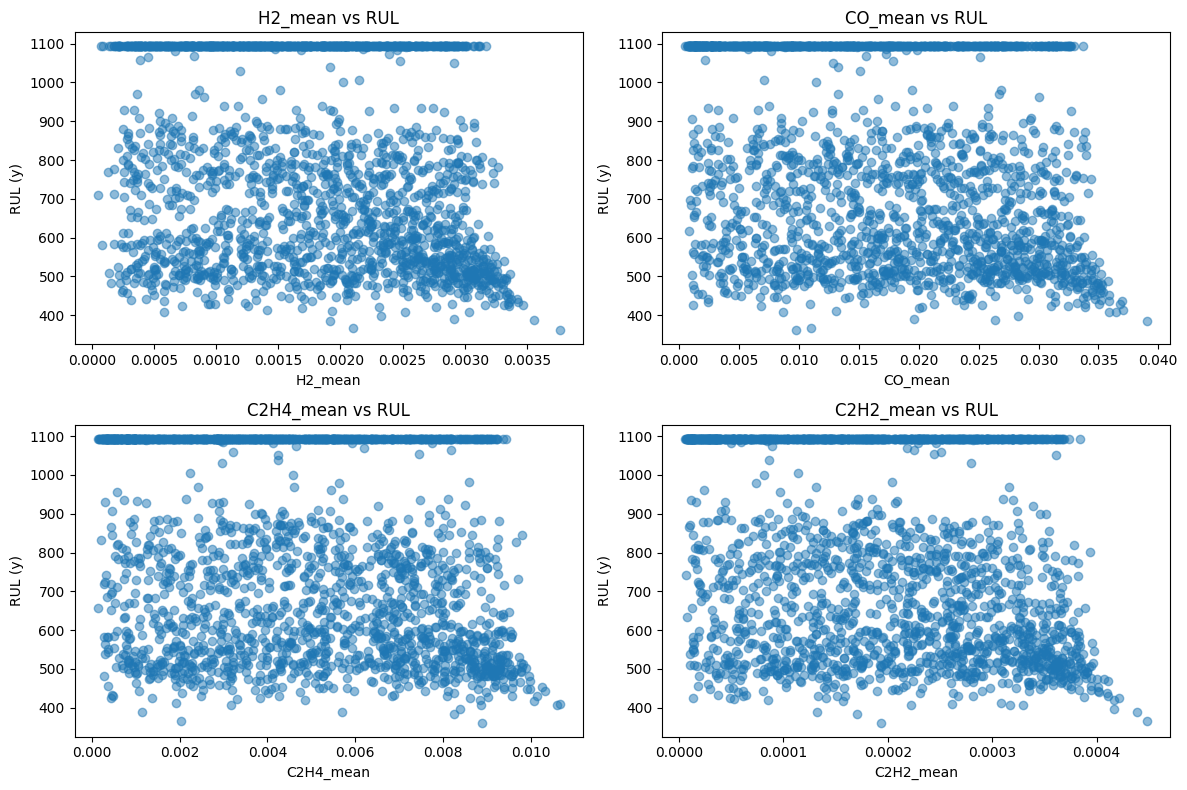

In [14]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    plt.scatter(X[column], y, alpha=0.5)
    plt.title(f'{column} vs RUL')
    plt.xlabel(column)
    plt.ylabel('RUL (y)')
    
plt.tight_layout()
plt.show()


**Splitting the Data**

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
print(f"Training data shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Validation data shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

Training data shape (X_train, y_train): (1575, 4), (1575, 1)
Validation data shape (X_val, y_val): (525, 4), (525, 1)


**Using Linear Regression model**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f'MAE on training set: {mae_train:.2f}')
print(f'MAE on validation set: {mae_val:.2f}')


MAE on training set: 177.70
MAE on validation set: 175.12


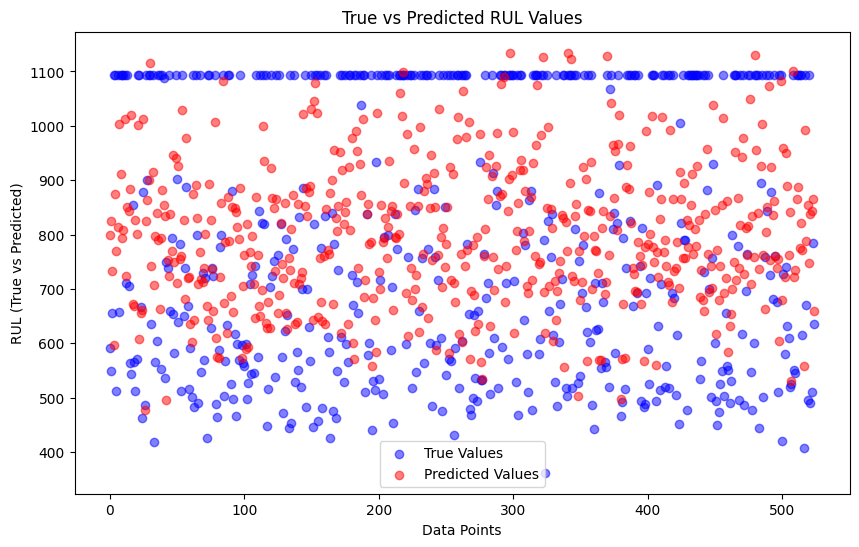

In [19]:
y_val_pred = lr.predict(X_val)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='True Values')
plt.scatter(range(len(y_val)), y_val_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('RUL (True vs Predicted)')
plt.title('True vs Predicted RUL Values')
plt.legend()
plt.show()

**Using RobustScaler**

In [24]:
from sklearn.preprocessing import RobustScaler


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

scaler = RobustScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

lr = LinearRegression()
lr.fit(X_train, y_train_scaled)

y_train_scaled_pred = lr.predict(X_train)
y_val_scaled_pred = lr.predict(X_val)

y_train_pred = scaler.inverse_transform(y_train_scaled_pred)
y_val_pred = scaler.inverse_transform(y_val_scaled_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f'MAE on training set: {mae_train:.2f}')
print(f'MAE on validation set: {mae_val:.2f}')


MAE on training set: 177.70
MAE on validation set: 175.12


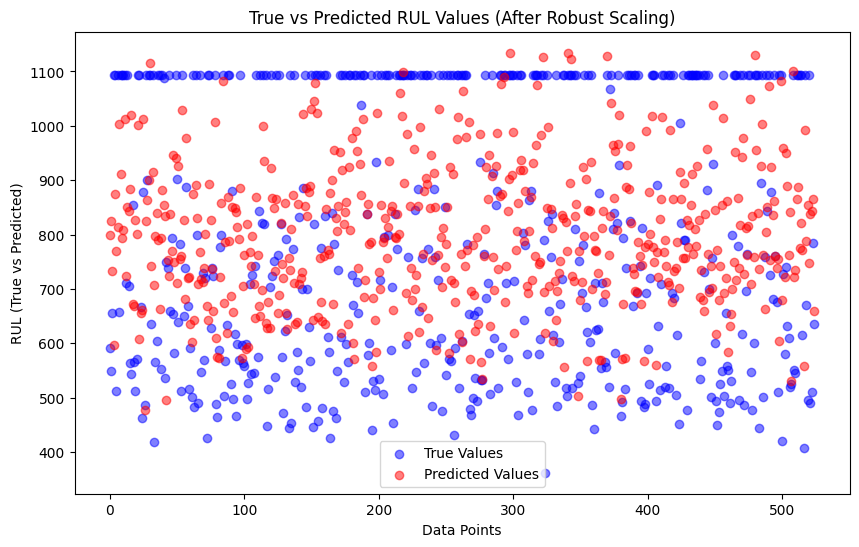

In [25]:
y_val_scaled_pred = lr.predict(X_val)

y_val_pred = scaler.inverse_transform(y_val_scaled_pred)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='True Values')
plt.scatter(range(len(y_val_pred)), y_val_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('RUL (True vs Predicted)')
plt.title('True vs Predicted RUL Values (After Robust Scaling)')
plt.legend()
plt.show()

**Using log transformation**

In [26]:
y_train_log = np.log1p(y_train) 

lr.fit(X_train, y_train_log)

y_train_log_pred = lr.predict(X_train)
y_val_log_pred = lr.predict(X_val)

y_train_pred = np.expm1(y_train_log_pred)
y_val_pred = np.expm1(y_val_log_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f'MAE on training set after Log Transformation: {mae_train:.2f}')
print(f'MAE on validation set after Log Transformation: {mae_val:.2f}')


MAE on training set after Log Transformation: 177.02
MAE on validation set after Log Transformation: 172.56


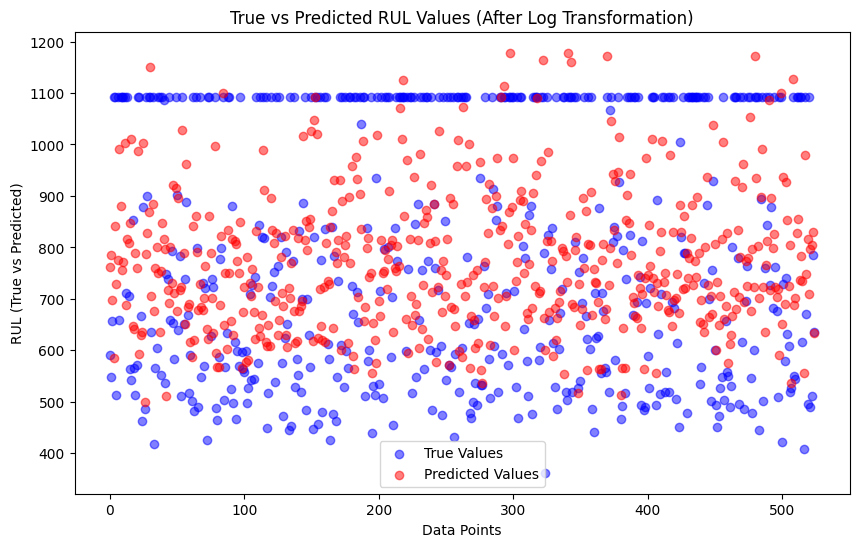

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='True Values')

plt.scatter(range(len(y_val_pred)), y_val_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('RUL (True vs Predicted)')
plt.title('True vs Predicted RUL Values (After Log Transformation)')

plt.legend()

plt.show()